In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
file_path = r'Dataset\cleaned_heart_failure_dataset.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)
df["heart_attack"] = df["heart_attack"].astype(int)

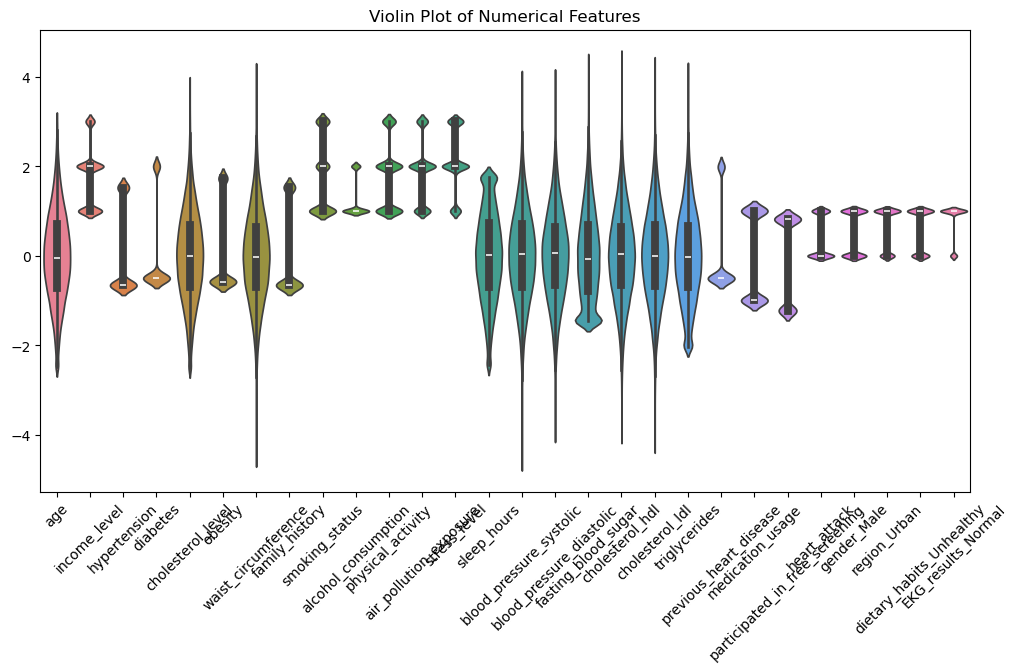

In [3]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Violin Plot of Numerical Features")
plt.show()


In [4]:
column_filter = ['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'fasting_blood_sugar', 'previous_heart_disease', 'heart_attack']
df = df[column_filter]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63507 entries, 0 to 63506
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     63507 non-null  float64
 1   hypertension            63507 non-null  float64
 2   diabetes                63507 non-null  float64
 3   cholesterol_level       63507 non-null  float64
 4   obesity                 63507 non-null  float64
 5   waist_circumference     63507 non-null  float64
 6   fasting_blood_sugar     63507 non-null  float64
 7   previous_heart_disease  63507 non-null  float64
 8   heart_attack            63507 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 4.1 MB


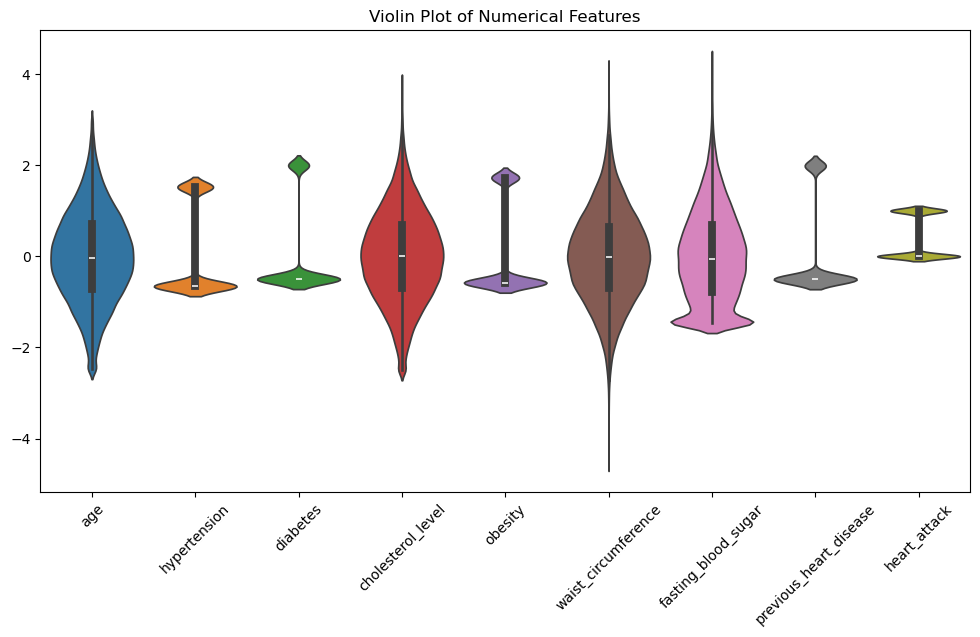

In [6]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Violin Plot of Numerical Features")
plt.show()


In [7]:
# Define the target variable and features
X = df.drop(columns=['heart_attack'])  # Features
y = df['heart_attack']  # Target variable

# Assume X and y are your features and labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (44454, 8), X_test shape: (9527, 8)
y_train shape: (44454,), y_test shape: (9527,)


In [8]:
df["heart_attack"].value_counts()

heart_attack
0    37786
1    25721
Name: count, dtype: int64

In [9]:
len(df)

63507

In [ ]:

param_grid = {
    "n_estimators": [100, 300],  
    "max_depth": [3, 6],  
    "learning_rate": [0.01, 0.1, 0.2],  
    "gamma": [0, 0.1, 0.3],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0]  
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


c:\Users\LENOVO\anaconda3\envs\comp_vision\lib\site-packages\xgboost\core.py:158: UserWarning: [08:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [11]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\LENOVO\anaconda3\envs\comp_vision\lib\site-packages\xgboost\core.py:158: UserWarning: [08:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      5668
           1       0.69      0.59      0.64      3859

    accuracy                           0.73      9527
   macro avg       0.72      0.70      0.71      9527
weighted avg       0.72      0.73      0.72      9527



In [ ]:
# Define the base model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)


# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      5668
           1       0.69      0.58      0.63      3859

    accuracy                           0.72      9527
   macro avg       0.72      0.70      0.71      9527
weighted avg       0.72      0.72      0.72      9527



In [13]:
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")  # Use softmax for multi-class classification
])


In [14]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32)

Epoch 1/50
1390/1390 [==============================] - 11s 6ms/step - loss: 0.5680 - accuracy: 0.7002 - val_loss: 0.5310 - val_accuracy: 0.7195
Epoch 2/50
1390/1390 [==============================] - 6s 4ms/step - loss: 0.5503 - accuracy: 0.7113 - val_loss: 0.5342 - val_accuracy: 0.7165
Epoch 3/50
1390/1390 [==============================] - 9s 6ms/step - loss: 0.5468 - accuracy: 0.7119 - val_loss: 0.5321 - val_accuracy: 0.7243
Epoch 4/50
1390/1390 [==============================] - 11s 8ms/step - loss: 0.5456 - accuracy: 0.7128 - val_loss: 0.5290 - val_accuracy: 0.7213
Epoch 5/50
1390/1390 [==============================] - 9s 6ms/step - loss: 0.5444 - accuracy: 0.7131 - val_loss: 0.5273 - val_accuracy: 0.7199
Epoch 6/50
1390/1390 [==============================] - 8s 6ms/step - loss: 0.5441 - accuracy: 0.7155 - val_loss: 0.5317 - val_accuracy: 0.7170
Epoch 7/50
1390/1390 [==============================] - 8s 6ms/step - loss: 0.5417 - accuracy: 0.7166 - val_loss: 0.5283 - val_accurac

In [15]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_acc)
y_pred = model.predict(X_test_scaled)
print(y_pred[:5])  # Show first 5 predictions


298/298 [==============================] - 2s 6ms/step - loss: 0.5332 - accuracy: 0.7230
Test Accuracy: 0.722997784614563
298/298 [==============================] - 3s 4ms/step
[[0.6906472 ]
 [0.19157714]
 [0.77394736]
 [0.80953276]
 [0.668469  ]]
